In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 34.7 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
!pip install mapclassify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
import plotly.express as px
import geopandas
import mapclassify
po.init_notebook_mode(connected = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2020.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,10299,2012,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,nc
1,9500,2011,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,nc
2,3995,2004,honda,element,NaN,NaN,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,nc
3,12995,2015,kia,sportage,NaN,NaN,gas,85127.0,clean,automatic,4wd,NaN,wagon,NaN,nc
4,10995,2014,chevrolet,traverse,NaN,NaN,gas,112383.0,clean,automatic,fwd,NaN,SUV,black,nc


# 1. Features detail

In [ ]:
print('Numeric Features Details:\n')
print(f'Price Range: {min(df.price)}-{max(df.price)}')
print(f'Year Range: {min(df.year)}-{max(df.year)}')
print(f'Odometer Range: {min(df.odometer)}-{max(df.odometer)}')

Numeric Features Details:

Price Range: 311-83000
Year Range: 1990-2020
Odometer Range: 0.0-399961.0


In [ ]:
print('Categorical Features Details:\n')
print(f'Manufacturer: {df.manufacturer.unique()}\n Count: {df.manufacturer.nunique()}\n')
print(f'Model: {df.model.unique()}\n Count: {df.model.nunique()}\n')
print(f'Condition: {df.condition.unique()}\n Count: {df.condition.nunique()}\n')
print(f'Cylinders	: {df.cylinders.unique()}\n Count: {df.cylinders.nunique()}\n')
print(f'Fuel: {df.fuel.unique()}\n Count: {df.fuel.nunique()}\n')
print(f'Title Status: {df.title_status.unique()}\n Count: {df.title_status.nunique()}\n')
print(f'Transmission: {df.transmission.unique()}\n Count: {df.transmission.nunique()}\n')
print(f'Drive: {df.drive.unique()}\n Count: {df.drive.nunique()}\n')
print(f'Type: {df.type.unique()}\n Count: {df.type.nunique()}\n')
print(f'Paint Color: {df.paint_color.unique()}\n Count: {df.paint_color.nunique()}\n')
print(f'State: {df.state.unique()}\n Count: {df.state.nunique()}\n')

Categorical Features Details:

Manufacturer: ['acura' 'jaguar' 'honda' 'kia' 'chevrolet' 'bmw' 'toyota' 'nissan'
 'volkswagen' 'ford' 'gmc' 'subaru' 'ram' 'lexus' 'volvo' 'dodge' 'buick'
 'jeep' 'hyundai' 'mercedes-benz' 'cadillac' 'audi' 'infiniti' 'pontiac'
 'chrysler' 'rover' 'mazda' 'mini' 'mercury' nan 'fiat' 'harley-davidson'
 'saturn' 'mitsubishi' 'lincoln' 'tesla' 'alfa-romeo' 'aston-martin'
 'ferrari' 'porche' 'land rover' 'hennessey']
 Count: 41

Model: ['tl' 'xf' 'element' ... '2500 truck' 'van 1500 cargo'
 '3500 laramie megacab']
 Count: 27216

Condition: [nan 'excellent' 'good' 'fair' 'like new' 'salvage' 'new']
 Count: 6

Cylinders	: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' '3 cylinders'
 '10 cylinders' 'other' '12 cylinders']
 Count: 8

Fuel: ['gas' 'diesel' nan 'hybrid' 'other' 'electric']
 Count: 5

Title Status: ['clean' 'salvage' 'rebuilt' 'lien' nan 'missing' 'parts only']
 Count: 6

Transmission: ['automatic' nan 'manual' 'other']
 Count: 3

Dri

# 2. Price distribution: is not normally distributed, and concentrates on 0-$100,000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


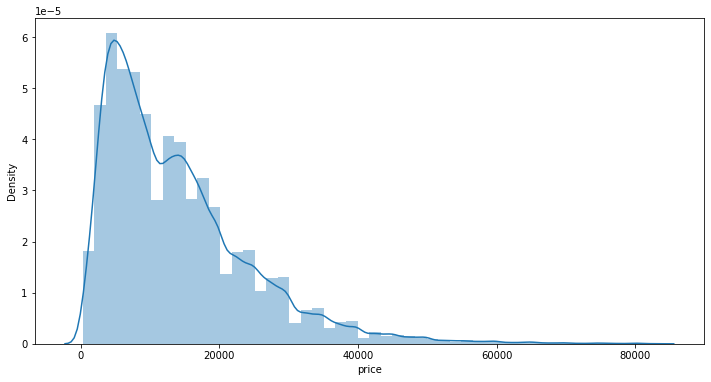

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.distplot(df['price'])

# 3. Manufacturer: 
*   Top5 manufacturer by number of cars: Ford(45678), Chevrolet(35293), Toyota(24242), Honda(15513), Nissan(13140)

In [ ]:
df_m = df['manufacturer'].value_counts().reset_index()
df_m.columns = ['manufacturer','number']

Text(0.5, 1.0, 'Barplot of cars number with different manufacturers')

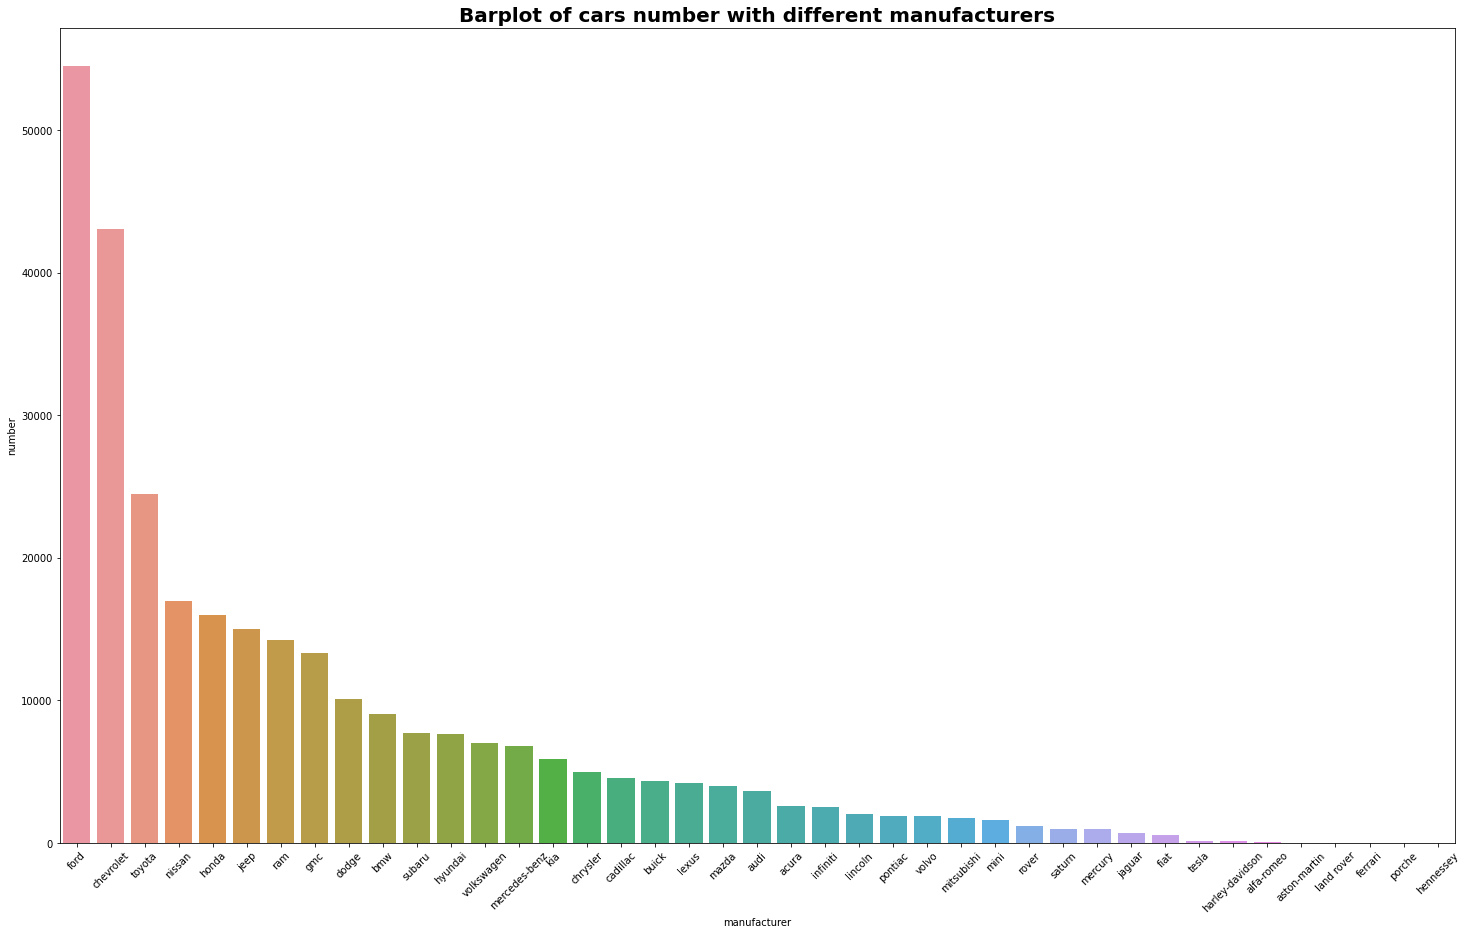

In [ ]:
fig=plt.figure(figsize=(25,15))
sns.barplot(x=df_m.manufacturer, y=df_m.number)
plt.xticks(rotation= 45)
plt.title('Barplot of cars number with different manufacturers',size=20, weight='bold')

*   The price of different manufacturers is shown as following boxplot:

In [ ]:
my_order = df.groupby(['manufacturer'])['price'].agg(['median']).sort_values(by='median').index

Text(0.5, 1.0, 'Boxplot of price with different manufacturers: sort by median price')

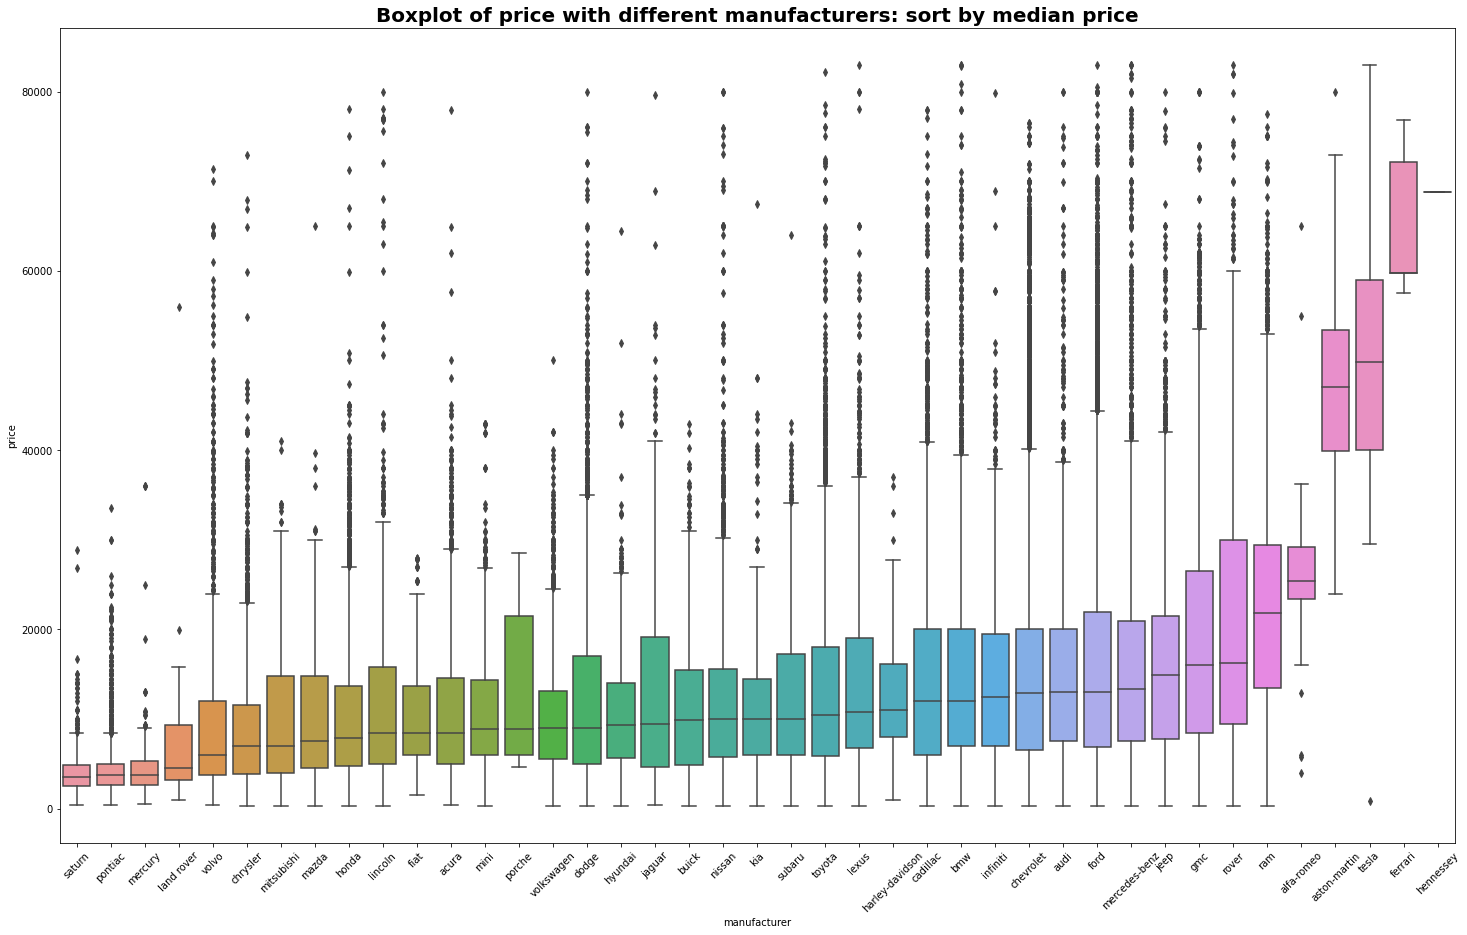

In [ ]:
fig=plt.figure(figsize=(25,15))
sns.boxplot(data=df, x=df['manufacturer'],y='price',order=my_order)
plt.xticks(rotation= 45)
plt.title('Boxplot of price with different manufacturers: sort by median price',size=20, weight='bold')

# 4. Odometer: generally speaking, the greater the mileage, the lower the price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


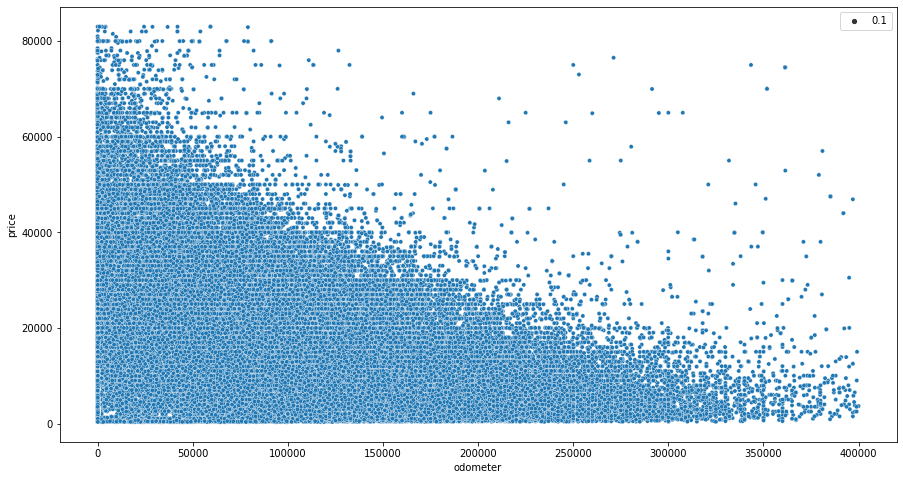

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.scatterplot(df.odometer,df.price,size=0.1)

# 5. Year: over 60% of the cars are within the last 10 years.

In [ ]:
df_y = df['year'].value_counts().reset_index()
df_y.columns = ['year','number']
total_number = df['year'].count()

In [ ]:
def year_number(y):
  num = 0
  for i in df_y['year']:
    if i>(2021-y):
      num += df_y.loc[df_y['year']==i, 'number'].iloc[0]
  print(f'There are {num} cars for the last {y} years, which is {np.round(num/total_number*100,decimals=2)}% of the entire market.')      

year_number(5)
year_number(10)

There are 51240 cars for the last 5 years, which is 16.78% of the entire market.
There are 160951 cars for the last 10 years, which is 52.72% of the entire market.


# 6. Condition	& Cylinders	& Fuel &	Status & Transmission	& Drive	 & Size	& Type & Color

In [ ]:
df_condition = pd.DataFrame(df['condition'].dropna(inplace=False))
df_cylinders = pd.DataFrame(df['cylinders'].dropna(inplace=False))
df_fuel = pd.DataFrame(df['fuel'].dropna(inplace=False))

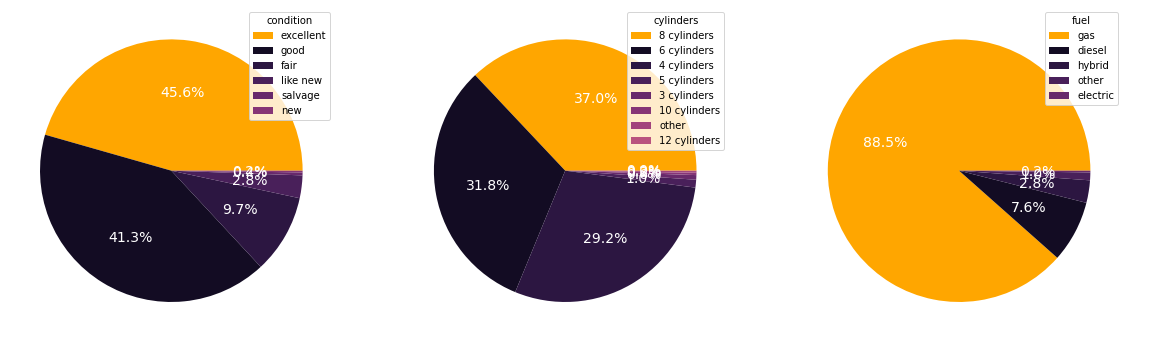

In [ ]:
color = ['#ffa600','#130c23','#2c1641','#49205a','#68296b','#863576','#a2437c','#b9537e','#cc6680','#e17c83','#e5ac93','#e8c4a4','#ecdbbd','#f2eedb']
font1 = {'fontsize': 14, 'color': 'w'}
fig=plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.pie(df_condition['condition'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_condition['condition'].unique())
plt.legend(loc='upper right', title='condition')
plt.subplot(1,3,2)
plt.pie(df_cylinders['cylinders'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_cylinders['cylinders'].unique())
plt.legend(loc='upper right', title='cylinders')
plt.subplot(1,3,3)
plt.pie(df_fuel['fuel'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_fuel['fuel'].unique())
plt.legend(loc='upper right', title='fuel')

In [ ]:
df_title_status = pd.DataFrame(df['title_status'].dropna(inplace=False))
df_transmission = pd.DataFrame(df['transmission'].dropna(inplace=False))
df_drive = pd.DataFrame(df['drive'].dropna(inplace=False))

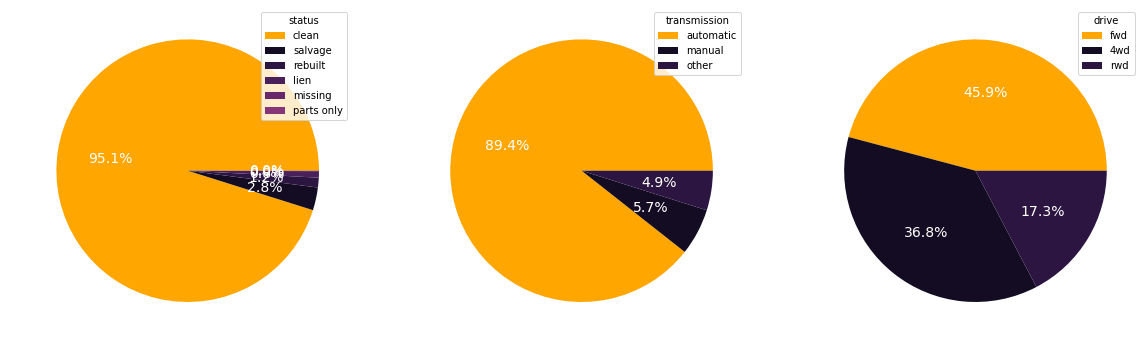

In [ ]:
fig=plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.pie(df_title_status['title_status'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_title_status['title_status'].unique())
plt.legend(loc='upper right', title='status')
plt.subplot(1,3,2)
plt.pie(df_transmission['transmission'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_transmission['transmission'].unique())
plt.legend(loc='upper right', title='transmission')
plt.subplot(1,3,3)
plt.pie(df_drive['drive'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_drive['drive'].unique())
plt.legend(loc='upper right', title='drive')

In [ ]:
df_size = pd.DataFrame(df['size'].dropna(inplace=False))
df_type = pd.DataFrame(df['type'].dropna(inplace=False))
df_paint_color = pd.DataFrame(df['paint_color'].dropna(inplace=False))

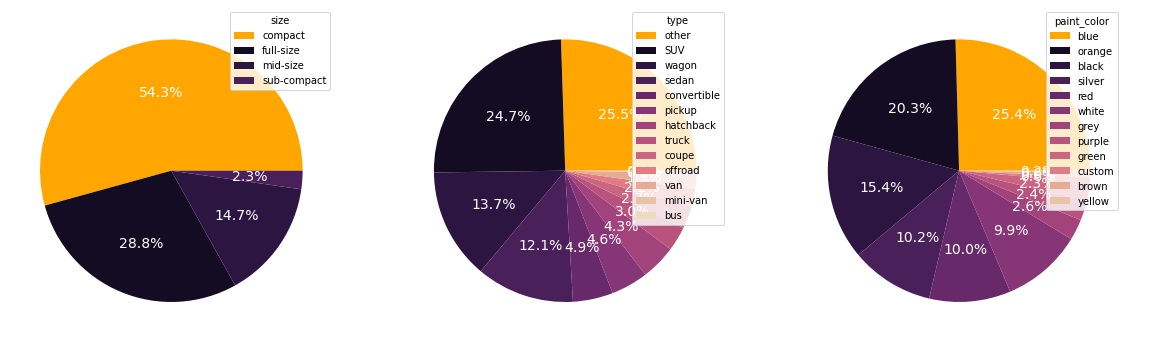

In [ ]:
fig=plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.pie(df_size['size'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_size['size'].unique())
plt.legend(loc='upper right', title='size')
plt.subplot(1,3,2)
plt.pie(df_type['type'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_type['type'].unique())
plt.legend(loc='upper right', title='type')
plt.subplot(1,3,3)
plt.pie(df_paint_color['paint_color'].value_counts(), autopct='%1.1f%%', textprops=font1, colors=color, labels=df_paint_color['paint_color'].unique())
plt.legend(loc='upper right', title='paint_color')

# 7. Distribution

In [ ]:
df['state'] = df['state'].str.upper()
by_state_price = df.groupby('state')['price']\
                .agg(mean_price='mean',median_price='median',max_price='max',min_price='min',countn='count')\
                .reset_index()
by_state_price['mean_price']=round(by_state_price['mean_price'],2)
by_state_price.rename(columns={'state':'STUSPS'},inplace=True)
by_state_price.head()

,STUSPS,mean_price,median_price,max_price,min_price,countn
0,AK,22375.02,20988.0,76999,314,2390
1,AL,14001.78,11952.0,82185,450,5233
2,AR,16385.47,13500.0,80000,311,3279
3,AZ,13744.78,10952.0,82999,350,5850
4,CA,14862.41,12900.0,82999,315,28286


In [ ]:
data = dict(type = 'choropleth',
            locations = by_state_price['STUSPS'],
            locationmode = 'USA-states',
            z = by_state_price['median_price'],# changable
            text = ['median_price'],
            marker = dict(line=dict(color='rgb(255,255,255)', width = 2)),
            colorscale = 'ylorrd',
            colorbar = {'title':'median price'},
            )

In [ ]:
layout = dict(title = 'Median Price of Each State',
              geo = dict(scope='usa',
                        showlakes = True,
                        lakecolor = 'rgb(0,191,255)')
              )
x = go.Figure(data = [data], layout = layout)
po.iplot(x)


In [ ]:
for col in by_state_price.columns:
    by_state_price[col] = by_state_price[col].astype(str)

by_state_price['text'] = by_state_price['state'] + '<br>' + \
    'Mean Price: ' + by_state_price['mean_price'] +'<br>'+ \
    'Median Price: ' + by_state_price['median_price'] + '<br>' + \
    'Max Price:' + by_state_price['max_price'] +'<br>' +\
    'Min Price:' + by_state_price['min_price']  +'<br>' +\
    'N = ' + by_state_price['countn']

fig = go.Figure(data=go.Choropleth(
    locations=by_state_price['state'],
     z=by_state_price['countn'],
    #z=by_state_price['mean_price'],
    locationmode='USA-states',
    colorscale='ylorrd',
    autocolorscale=False,
    text=by_state_price['text'], 
    marker_line_color='white', 
    colorbar_title="Count"
))

fig.update_layout(
    title_text='2021 US Used Car Price by State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(0,191,255)'),
)

fig.show()

In [ ]:
path = "/content/drive/MyDrive/EMSE 6574 Project/cb_2018_us_state_20m"
geo_usa = geopandas.read_file(path)
# merge geo_usa and by_state_price on STUSPS
geo_merge = geo_usa.merge(by_state_price, on='STUSPS')

In [ ]:
geo_merge.head()

In [ ]:
usa_mainland = geo_merge[(geo_merge['NAME']!='Alaska') & (geo_merge['NAME']!='Hawaii')]

Text(0.5, 1.0, 'Median Price of Used Cars in Each State')

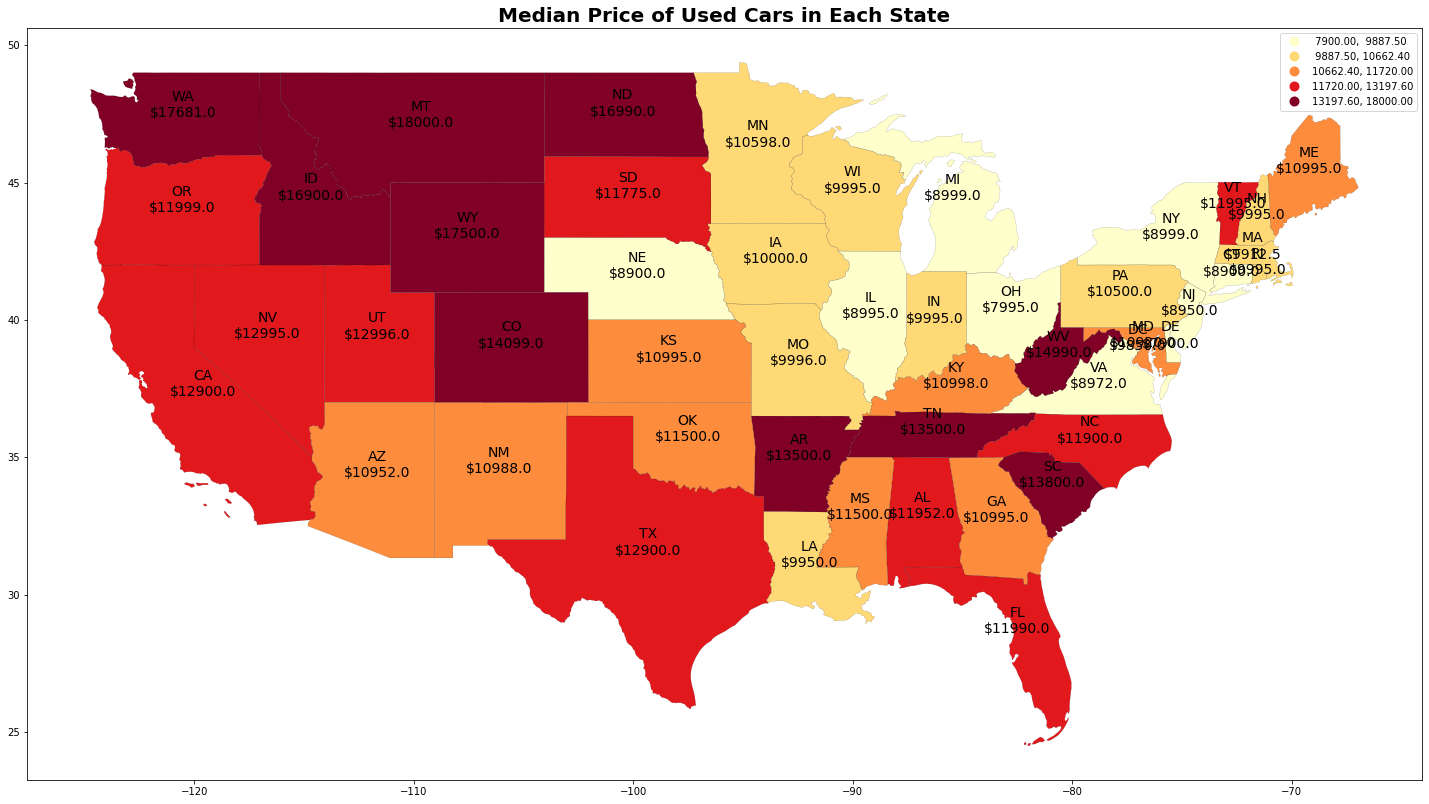

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
usa_mainland.apply(lambda x: ax.annotate(
    s=x.STUSPS + '\n' + '$' + str(x.median_price), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);
usa_mainland.boundary.plot(ax=ax,color='Black', linewidth=.1)
usa_mainland.plot(ax=ax,column='median_price',scheme='quantiles',cmap='YlOrRd', figsize=(25, 15),legend=True)
plt.title('Median Price of Used Cars in Each State',size=20, weight='bold')

Text(0.5, 1.0, 'Numbers of Used Cars in Each State')

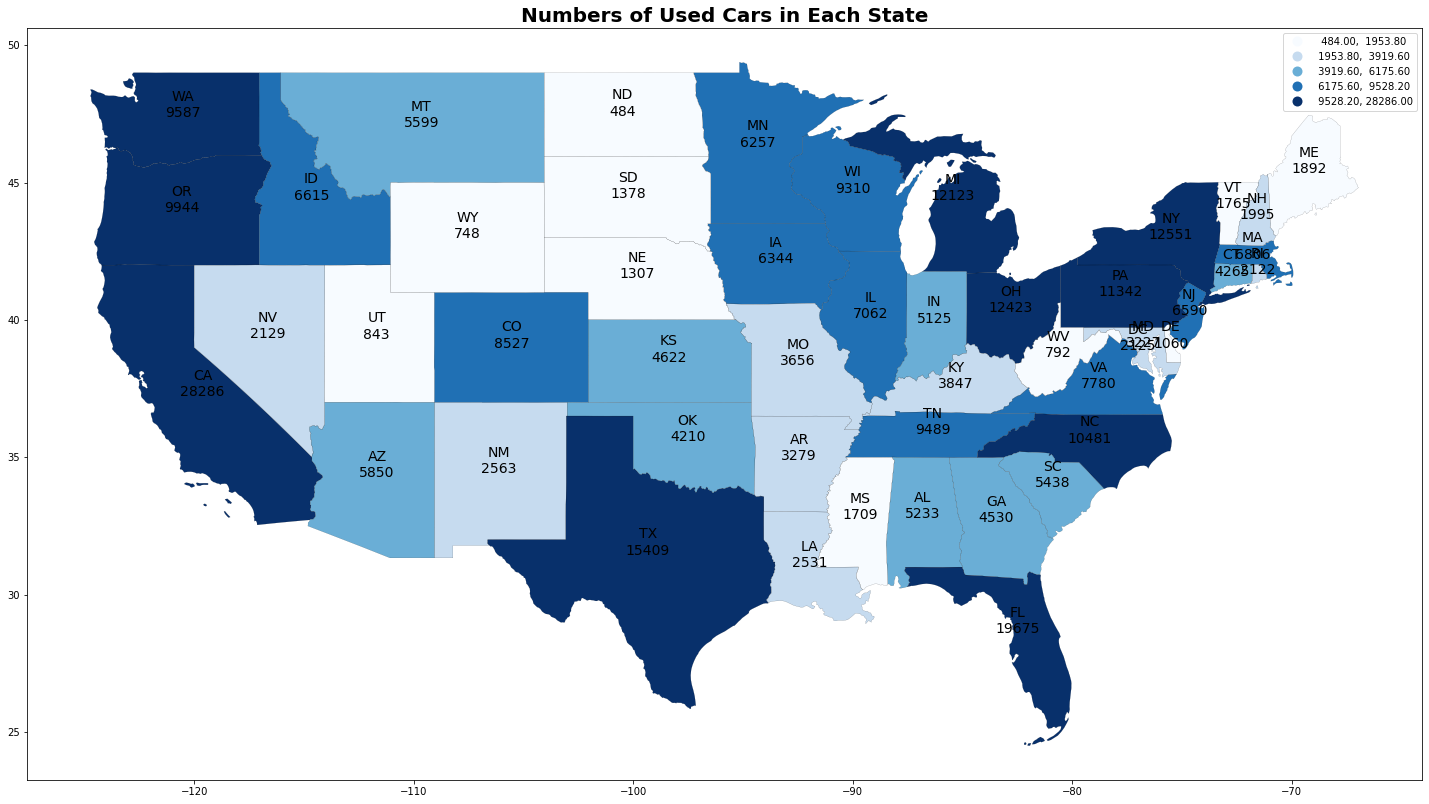

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
usa_mainland.apply(lambda x: ax.annotate(
    s=x.STUSPS + '\n' + str(x.countn), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);
usa_mainland.boundary.plot(ax=ax,color='Black', linewidth=.1)
usa_mainland.plot(ax=ax,column='countn',scheme='quantiles',cmap='Blues', figsize=(25, 15),legend=True)
plt.title('Numbers of Used Cars in Each State',size=20, weight='bold')